In [1]:
import pandas as pd

In [2]:
import pickle

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from pandas.plotting import scatter_matrix

In [6]:
from matplotlib import pyplot

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
from sklearn.metrics import f1_score

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
from sklearn import tree

# THE START OF OUR PROGRAM

In [14]:
print("Dataset:")

Dataset:


In [15]:
dataset = pd.read_csv('lung_cancer_examples.csv')

In [16]:
print(len(dataset))

59


In [17]:
print(dataset.head())

     Name      Surname  Age  Smokes  AreaQ  Alkhol  Result
0    John         Wick   35       3      5       4       1
1    John  Constantine   27      20      2       5       1
2  Camela     Anderson   30       0      5       2       0
3    Alex       Telles   28       0      8       1       0
4   Diego     Maradona   68       4      5       6       1


# Plotting Data In The form Of Graphs

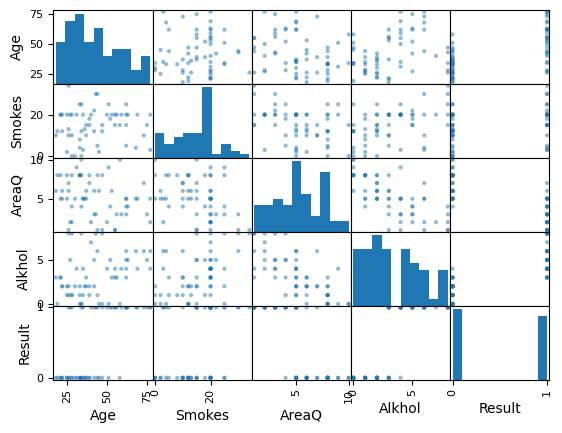

In [18]:
scatter_matrix(dataset)
pyplot.show()

# Analyzing Or Visualizing The Plot With Each Other Attribute
                               "SMOKES VS AGE"

In [19]:
A = dataset[dataset.Result==1]
B = dataset[dataset.Result==0]

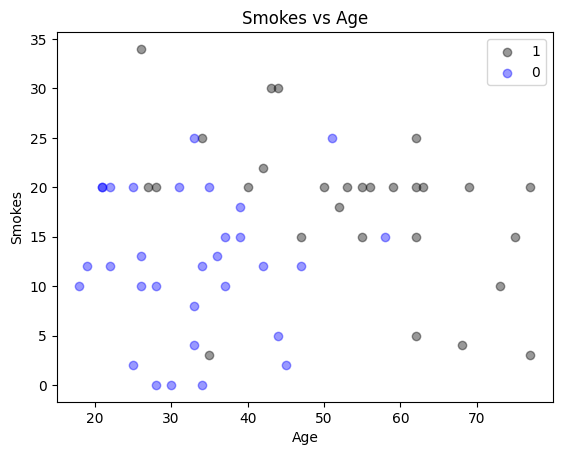

In [20]:
plt.scatter(A.Age, A.Smokes, color="Black", label="1", alpha=0.4)
plt.scatter(B.Age, B.Smokes, color="Blue", label="0", alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Smokes")
plt.legend()
plt.title("Smokes vs Age")
plt.show()

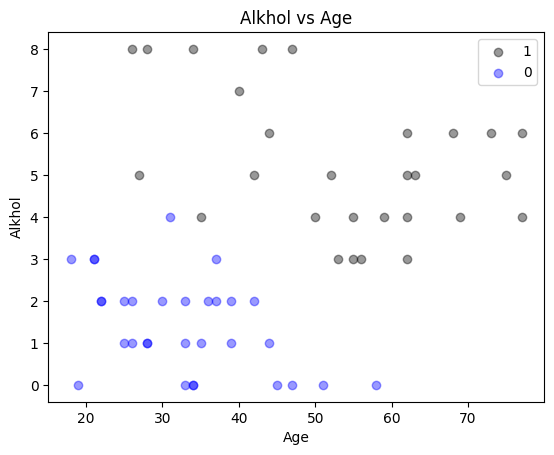

In [21]:
plt.scatter(A.Age, A.Alkhol, color="Black", label="1", alpha=0.4)
plt.scatter(B.Age, B.Alkhol, color="Blue", label="0", alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Alkhol")
plt.legend()
plt.title("Alkhol vs Age")
plt.show()

# Splitting The Dataset Into Train & Test Data

In [22]:
x = dataset.iloc[:, 3:5]
y = dataset.iloc[:, 6]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

# Feature Scaling Technique

In [23]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# KNN Algorithm [finding length_breadth of dataset after splitting]

In [24]:
import math
a = math.sqrt(len(y_train))
print(a)

6.855654600401044


Defining The Model

In [25]:
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')

Fitting The Model

In [26]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

Prediction Of Test Data Set Result

In [27]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 1 0 0 0 0 1 1 0 0]


Evaluation Process using Confusion Matrix

In [28]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion_matrix: ")
print(cm)
print("Position 1.1 shows the patiemts that don't have Cancer, In this case = 7")
print("Position 1.2 shows the number of patients that have high risk of Cancer, In this case = 1")
print("Position 2.1 shows the Incorrect vVlue, In this case = 1")
print("Position 2.2 shows the correct number of patients that have Cancer, In this case = 3")

Confusion_matrix: 
[[7 1]
 [1 3]]
Position 1.1 shows the patiemts that don't have Cancer, In this case = 7
Position 1.2 shows the number of patients that have high risk of Cancer, In this case = 1
Position 2.1 shows the Incorrect vVlue, In this case = 1
Position 2.2 shows the correct number of patients that have Cancer, In this case = 3


In [29]:
print('F1 Score : ', (f1_score(y_test, y_pred))*100)

F1 Score :  75.0


In [30]:
print('ACCURACY : ', (accuracy_score(y_test, y_pred))*100)

ACCURACY :  83.33333333333334


# DECISION TREE

In [31]:
c = tree.DecisionTreeClassifier()
c.fit(x_train, y_train)
accu_train = np.sum(c.predict(x_train)==y_train) /  float(y_train.size)
accu_test = np.sum(c.predict(x_test)==y_test) /  float(y_test.size)
print('classification accuracy on train', (accu_train)*100)
print('classification accuracy on test', (accu_test)*100)

classification accuracy on train 95.74468085106383
classification accuracy on test 75.0


In [32]:
# Save the trained model as a pickle file
with open('classifier.pkr', 'wb') as f:
    pickle.dump(classifier, f)

In [33]:
import pickle
import pandas as pd

# Load the saved model from the pickle file
with open('classifier.pkr', 'rb') as f:
    model = pickle.load(f)

ds = pd.read_csv('unknown.csv')

# Use the model to make predictions on new data
X_new = ds.iloc[:, 3:5]
y_pred = model.predict(X_new.values)
print(y_pred)

[1 0 0 0 0 0 0 0 1 0 0 0 1 1 0]
